# <center> Exploratory Data Analysis </center>

<center> Notebook One </center>
<center> Investigating Data Downloaded from Ontario's Independent Electricity System Operator </center>

Prepared by: Behrouz ShakeriFard

contact: bshakeri@ryerson.ca

May 2022

## Introduction:

Ontario's Independent Electricity Systems Operator (IESO) records key variables of Ontario's electricity system, and this data is available in CSV format for anyone who is interested. These variables include hourly prices, hourly demand, hourly output, capacity for generation, and more. This is the data that will be used for constructing our model.

Before getting started with the data we need to import a few useful python packages.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from scipy.stats import linregress

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

from matplotlib import style
from pylab import *

IESO stores each year's data separately. And for the purpose of this analysis (meaning the Exploratory Data Analysis or EDA) one year worth of data is more than enough. For now, we will be interested in three files, which contain quite a lot of data: 

- Hourly Ontario's Electricity Price (HOEP)
- Ontario and Market Demand
- Generator Output and Capacity (GOC)

These files can be found here: <a> https://www.ieso.ca/en/Power-Data/Data-Directory </a>

I am going to assume that you have never used Machine Learning algorithms, and the purpose of this piece is to introduce highly educated people (PhD level students with understanding of scientific methods, those who have done empirical work in the field of Social Sciences such as Economics, and those who have earned an undergrad degree in the fields of Mathematics, Statistics, or Economics) to the basic concepts of Machine Learning. So, first things first; let's do EDA.

EDA or Exploratory Data Analysis

# <center> Demand </center>

Ontario's demand for electricity is not uniform throughout the day, or season, or the entire year. We will import and examine this data below.

In [6]:
d_2018 = pd.read_csv('PUB_Demand_2018_v1.csv')

In [7]:
d_2018.head()

,\\Hourly Demand Report,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,\\Created at 2019-01-31 07:30:09,NaN,NaN,NaN
1,\\For 2018,NaN,NaN,NaN
2,Date,Hour,Market Demand,Ontario Demand
3,2018-01-01,1,18974,16627
4,2018-01-01,2,18447,16084


'Ontario Demand' represents the  sum of all loads within Ontario which is supplied from the market, plus all line losses incurred on the IESO-controlled grid.

'Market Demand' represents the total energy that was supplied from the IESO-administered market. The IESO calculates total market demand by summing all output from generators registered in the market plus all scheduled imports to the province.

For this analysis, we will use Market Demand as the variable of interest for representing total demand. This is because (as we will see later) we will need to look at total generation as well; hence, we can allow the difference between total demand and local generation to represent electricity imports necessary for meeting the shortcomings of the system.

In [8]:
shape(d_2018)

(8763, 4)

The number of rows in this DataFRame is 24 (hours) times 365 (days), plus three rows on top, we may choose to remove later.

In [9]:
24 * 366


8784

Year 2020 was a leap year, which means it had 366 days.

In [10]:
# renaming columns
d_2018.columns=['Date', 'Hour','Market Demand','Ontario Demand']

In [11]:
# dropping rows that contain unuseful information
d_2018.drop([0,1,2], inplace = True)

In [12]:
# sanity check
d_2018.head()

,Date,Hour,Market Demand,Ontario Demand
3,2018-01-01,1,18974,16627
4,2018-01-01,2,18447,16084
5,2018-01-01,3,18453,15866
6,2018-01-01,4,18662,15725
7,2018-01-01,5,18060,15470


In [13]:
# sanity check
d_2018.tail()

,Date,Hour,Market Demand,Ontario Demand
8758,2018-12-31,20,18276,16195
8759,2018-12-31,21,18046,15668
8760,2018-12-31,22,17516,14987
8761,2018-12-31,23,17506,14560
8762,2018-12-31,24,16704,13828


In [14]:
# reseting the index helps us to navigate the dataframe with more ease
d_2018 = d_2018.reset_index()

In [15]:
d_2018.drop(['index'], inplace=True, axis=1)

In [16]:
# sanity check
d_2018.head()

,Date,Hour,Market Demand,Ontario Demand
0,2018-01-01,1,18974,16627
1,2018-01-01,2,18447,16084
2,2018-01-01,3,18453,15866
3,2018-01-01,4,18662,15725
4,2018-01-01,5,18060,15470


In [17]:
# sanity check
d_2018.tail()

,Date,Hour,Market Demand,Ontario Demand
8755,2018-12-31,20,18276,16195
8756,2018-12-31,21,18046,15668
8757,2018-12-31,22,17516,14987
8758,2018-12-31,23,17506,14560
8759,2018-12-31,24,16704,13828


In [18]:
shape(d_2018)

(8760, 4)

All is Well!

Next, we will check for NAN, missing values or any other possible problems.

In [19]:
d_2018.isnull().sum()

Date              0
Hour              0
Market Demand     0
Ontario Demand    0
dtype: int64

We don't have missing values. 


In [20]:
d_2018.duplicated().sum()

0

We don't have duplicated values either. This is a very clean dataframe.

# <center> Exploring the Shape of Demand </center>

It would be nice to see the shape of demand, and look for possible demand fluctuations in our 24-hour cycles. For this purpose, we can construct a loop that goes through twenty four rows, for any given day.

In [29]:
# we can specify a day here
day = 100

""" in order to get the 24 values that we want, we must multiply
the number 24 by the number of day that we are interested in minus one.
    
For example, in order to get the data for the first day of the year,
we need to multiply zero and 24.
    
Similarly, for the second day of the year, we need to multiply one by 24.
And so on. """

starting_point = (day - 1 ) * 24
    
# this is a list that stores the 24 values that we are interested in
hrly_demand_list = []

# this loop will go through 24 values, representing 24 hours in a given day
for i in range(1,25):
    
    # The row that we are interested in
    row = starting_point + i
    hourly_demand = int(d_2018.iloc[row][2])
    hrly_demand_list.append(hourly_demand)
    

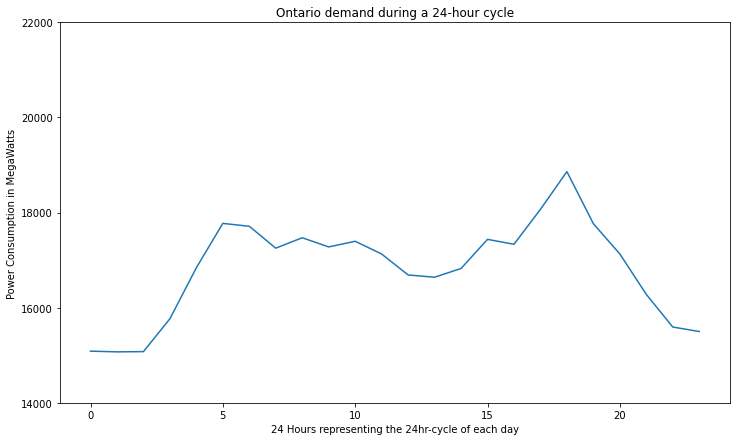

In [30]:
    
# the following lines will plot the list in order to show the 24-hour fluctuatons
x = np.arange(24)

# data = pd.DataFrame(data)
plt.figure(figsize=(12,7))
plt.plot(x,hrly_demand_list)

# title of the plot
plt.title('Ontario demand during a 24-hour cycle')
# x axis label
plt.xlabel('24 Hours representing the 24hr-cycle of each day')
# y axis label
plt.ylabel('Power Consumption in MegaWatts')

plt.yticks([14000,16000,18000,20000,22000])
# displaying the graph
plt.show()

The line shown in this graph shows the fluctuations of demand, as residents go through their daily activities. Mornings (soon after 5am) is when the first peak occurs. The next peak occurs after the work-hours end and residents come back home. 

But it is far from certain that the pattern repeats itself throughout the year. This is why we need a quick way of investigating the data: demand, generation, price, and more.


Below, I have created a function that accepts a number between 1 and 365 as input (representing a sample day in normal year) and produces a graph, showing the 24-hour cycle of data (in this case demand) and its variation.

In [21]:
def show_me_demand(day):
    starting_point = (day - 1 ) * 24
    
    # this is a list that stores the 24 values that we are interested in
    hrly_demand_list = []

    # this loop will go through 24 values, representing 24 hours in a given day
    for i in range(1,25):
    
        # The row that we are interested in
        row = starting_point + i
        hourly_demand = int(d_2018.iloc[row][2])
        hrly_demand_list.append(hourly_demand)
        
    # the following lines will plot the list in order to show the 24-hour fluctuatons
    x = np.arange(24)

    # data = pd.DataFrame(data)
    
    #initiating the plot
    plt.figure()
    plt.plot(x,hrly_demand_list)
    # title of the plot
    plt.title('Ontario Electricity Demand During a 24-hour Cycle')
    # x axis label
    plt.xlabel('24 Hours representing the 24hr-cycle of each day')
    # y axis label
    plt.ylabel('Power Consumption in MegaWatts')
    # values on the y axis
    plt.yticks([12000,14000,16000,18000,20000,22000,24000])
    # displaying the graph
    plt.show()

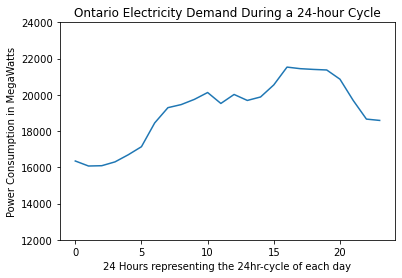

In [32]:
show_me_demand(12)

The graph above shows the 24-hour cycle of the 12th day of the year. This would be January 12th - a typical winter day. In order to understand the workings of this market, it would be wise to look at a few other days as well.

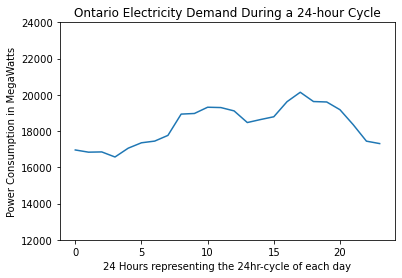

In [33]:
show_me_demand(42)

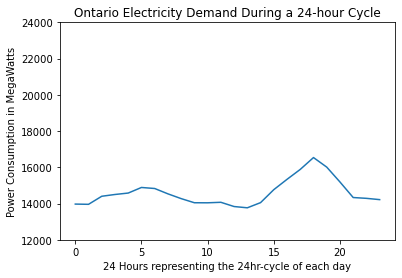

In [34]:
show_me_demand(112)

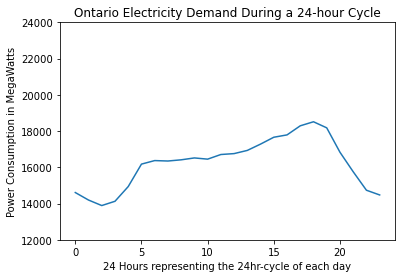

In [35]:
show_me_demand(143)

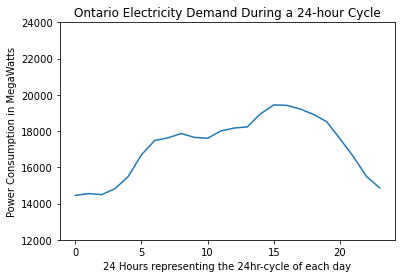

In [99]:
show_me_demand(165)

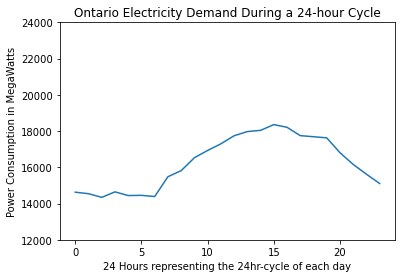

In [36]:
show_me_demand(210)

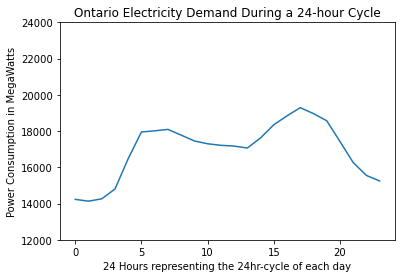

In [37]:
show_me_demand(290)

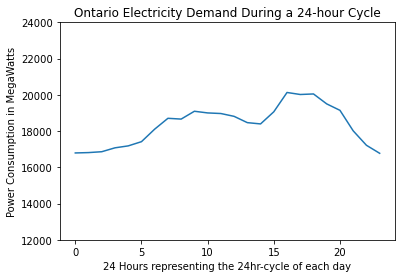

In [102]:
show_me_demand(342)

We would like to make sure all data is in the form that we would like it to be. In this example, we would like data to be of float or integer type. Prior to any modification, we would check for the data-type.

In [81]:
d_2018.dtypes

Date              object
Hour              object
Market Demand     object
Ontario Demand    object
dtype: object

Unfortunately, some modification is necessary. We are going to convert at least two columns to numeric data for future use.

In [82]:
# applying the numeric conversion
d_2018['Hour'] = d_2018['Hour'].apply(pd.to_numeric)


d_2018['Market Demand'] = d_2018['Market Demand'].apply(pd.to_numeric)

In [83]:
pivot_d_2018 = pd.pivot(d_2018.sort_values('Hour'),index='Date',columns='Hour',values="Market Demand")

Text(0.5, 1.0, 'Annual Average Demand - expressed in a 24-hour cycle')

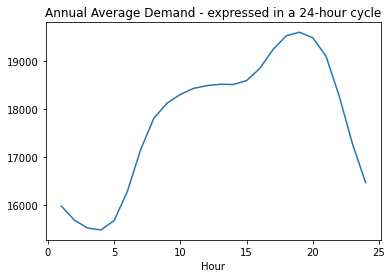

In [175]:
# this graph shows the average demand for electricity during the 24-hour cycle, 
# using the 8769 data points, reflecting 365 days of the year.
pivot_d_2018.mean().plot()
plt.title('Annual Average Demand - expressed in a 24-hour cycle')

Producing another dataframe with the difference between the value at each hour (total of 8760 values) and the mean value for that year, would be useful. This dataframe can inform us about where significant deviations from the norm have occured.

In [85]:
demand_deviation = pivot_d_2018 - pivot_d_2018.mean()

<AxesSubplot:xlabel='Hour', ylabel='Date'>

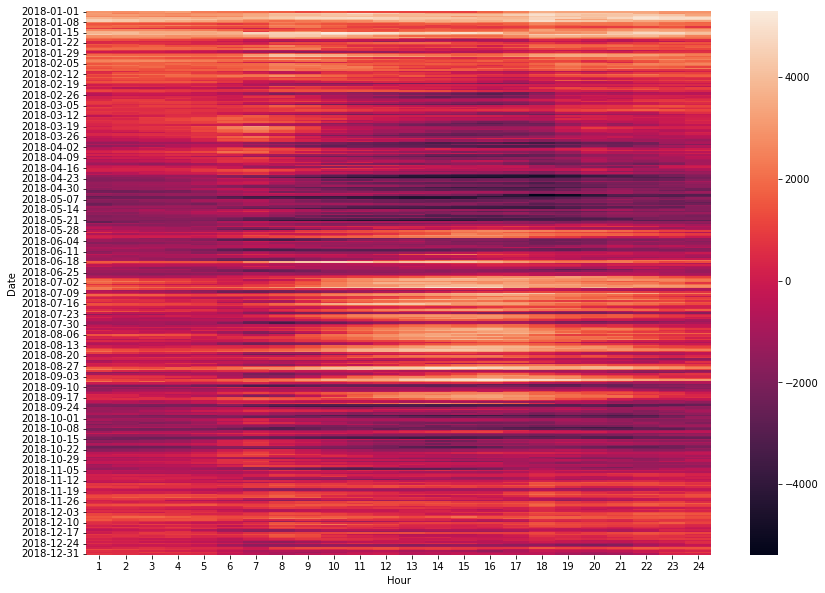

In [86]:
# heatmap for deviations from the mean
plt.figure(figsize=(14,10))
sns.heatmap(demand_deviation)

The heatmap above exhibits lighter colors during January (when residents are in need of more electricity because of the cold weather) and during July and August (when residents are in need of more electricity because of very warm temperatures which require air conditioning).

Darker colors can be observed during April and October, when temperatures outside are expected to be fairly close to the temperatures that are considered comfortable room temperatures. In other words, temperatures around 15 degrees celsius to 25 degrees celsius are associated with less than average demand for electricity.

# <center> Price </center>

Hourly Ontario Energy Price (HOEP) is a numeric variable that reflects the market fluctuations that occur during each hour in the province of Ontario. IESO has a mechanism for setting this price. This mechanism is unknown to us, and we are striving to produce a forecast model that projects the price, an hour from now, by learning from the past.


In order to achieve this, we need to import these prices.

In [22]:
# importing the file that is available on IESO website
pr_2018 = pd.read_csv('PUB_PriceHOEPPredispOR_2018.csv')

In [23]:
# sanity check
pr_2018.head()

,\\Yearly HOEP OR Predispatch Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,\\Created at 2019-01-31 08:02:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\\For 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
3,2018-01-01,1,51.29,40.62,35.50,40.32,0.20,0.20,0.19
4,2018-01-01,2,43.59,40.93,40.57,30.22,0.20,0.20,0.20


In [24]:
# another sanity check, for the HOEP column
pr_2018.sample(13)

,\\Yearly HOEP OR Predispatch Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1495,2018-03-04,5,14.32,13.00,13.00,0.00,1.32,0.20,0.20
2680,2018-04-22,14,6.14,13.00,13.00,13.36,0.32,0.20,0.20
2926,2018-05-02,20,62.37,28.00,22.00,29.82,37.33,32.29,26.21
6307,2018-09-20,17,0.00,30.57,32.69,NaN,4.36,0.30,0.16
8535,2018-12-22,13,24.27,21.00,21.00,21.00,0.26,0.20,0.20
1214,2018-02-20,12,14.36,13.00,13.00,6.12,9.18,9.18,4.76
3494,2018-05-26,12,33.28,32.15,32.15,32.40,9.92,9.92,9.92
207,2018-01-09,13,38.59,38.69,38.69,39.95,0.21,0.21,0.16
5942,2018-09-05,12,36.99,89.00,88.00,61.17,1.24,0.34,0.34
765,2018-02-01,19,30.76,38.22,38.72,39.73,29.61,29.61,0.16


In [25]:
shape(pr_2018)

(8763, 9)

The 8787 rows reflect the entire 366 days of the year 2020, with the 24 hours of data that has been logged for each day.
Columns include date, hour, HOEP (the price that we are interested in), price forecats provided by the IESO, and Operating Reserves.

Demand and supply rarely meet in the electricity systems. Which is why operating reserves (stand-by resource that is available to be dispatched in short notice, in order to meet demand, should an unanticipated event take place in the real-time energy market) are important. More information about Operating Reserves may be accessed here: <a> https://www.ieso.ca/en/Sector-Participants/Market-Operations/Markets-and-Related-Programs/Operating-Reserve-Markets </a>



For this analysis, we are interested in HOEP. However, operating reserve (10 min Synched) might be a good forward indicator of possible price spikes in the electricity market. This is why, keeping this column would make sense.

In [26]:
# dropping rows that contain unuseful information
pr_2018.drop([0,1,2], inplace = True)

In [27]:
# sanity check
pr_2018.head()

,\\Yearly HOEP OR Predispatch Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
3,2018-01-01,1,51.29,40.62,35.50,40.32,0.20,0.20,0.19
4,2018-01-01,2,43.59,40.93,40.57,30.22,0.20,0.20,0.20
5,2018-01-01,3,93.60,49.84,45.30,40.20,0.25,0.25,0.22
6,2018-01-01,4,54.78,55.60,40.04,45.30,0.20,0.20,0.20
7,2018-01-01,5,14.35,40.04,34.80,47.47,0.20,0.20,0.20


In [28]:
# renaming columns
pr_2018.columns=['Date','Hour','HOEP','Predisp 1','Predisp 2','Predisp 3','OperatingReserve 10minSynch', 'OR 10','OR 30']

In [29]:
# sanity check
pr_2018.head()

,Date,Hour,HOEP,Predisp 1,Predisp 2,Predisp 3,OperatingReserve 10minSynch,OR 10,OR 30
3,2018-01-01,1,51.29,40.62,35.50,40.32,0.20,0.20,0.19
4,2018-01-01,2,43.59,40.93,40.57,30.22,0.20,0.20,0.20
5,2018-01-01,3,93.60,49.84,45.30,40.20,0.25,0.25,0.22
6,2018-01-01,4,54.78,55.60,40.04,45.30,0.20,0.20,0.20
7,2018-01-01,5,14.35,40.04,34.80,47.47,0.20,0.20,0.20


We would like to make sure all data is in the form that we would like it to be. In this example, we would like data to be of float or integer type. Prior to any modification, we would check for the data-type.

In [31]:
pr_2018.dtypes

Date                           object
Hour                           object
HOEP                           object
Predisp 1                      object
Predisp 2                      object
Predisp 3                      object
OperatingReserve 10minSynch    object
OR 10                          object
OR 30                          object
dtype: object

Unfortunately, some modification is necessary. We are going to convert at least two columns to numeric data for future use.

In [41]:
# applying the numeric conversion
pr_2018['Hour'] = pr_2018['Hour'].apply(pd.to_numeric)
pr_2018['HOEP'] = pr_2018['HOEP'].apply(pd.to_numeric)


This Pivot may become useful later, if we are to do time-series analysis.

In [34]:
pd.pivot(pr_2018.sort_values('Hour'),index='Date',columns='Hour',values="HOEP")

Hour,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,51.29,43.59,93.60,54.78,14.35,18.60,21.72,40.89,20.75,74.57,...,26.73,42.12,42.28,44.84,42.22,41.06,43.76,48.38,42.58,38.14
2018-01-02,31.12,10.76,14.34,0.29,1.43,14.36,19.10,34.90,43.72,46.03,...,34.36,29.98,42.86,42.33,40.37,42.44,42.29,41.64,8.01,29.72
2018-01-03,2.31,19.43,0.00,0.00,0.00,0.00,32.26,66.58,79.95,88.93,...,40.84,56.34,82.30,89.30,88.01,81.94,83.84,84.16,76.34,46.04
2018-01-04,15.77,4.94,6.47,0.75,0.00,0.42,23.91,64.70,67.25,66.97,...,13.33,13.35,21.10,54.40,56.01,58.91,58.82,60.96,73.71,106.23
2018-01-05,18.50,13.33,13.36,13.34,13.45,9.69,68.23,77.02,79.79,77.02,...,68.42,75.97,77.90,105.23,112.51,95.42,128.05,77.94,69.07,67.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,8.10,6.47,9.31,0.00,0.00,0.00,0.00,11.53,14.35,14.37,...,7.46,5.95,8.67,14.36,14.37,41.83,14.36,27.71,3.76,0.00
2018-12-28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.82,...,5.22,0.00,0.00,4.54,4.22,5.57,0.38,2.68,0.00,0.00
2018-12-29,0.00,0.00,0.00,0.00,0.00,0.00,0.97,8.01,15.64,43.55,...,9.25,13.54,18.00,33.00,31.57,30.98,25.80,22.79,22.81,25.14


In [42]:
pivoted_pr_2018 = pd.pivot(pr_2018.sort_values('Hour'),index='Date',columns='Hour',values="HOEP")

Text(0.5, 1.0, 'Annual Average Price - expressed in a 24-hr cycle')

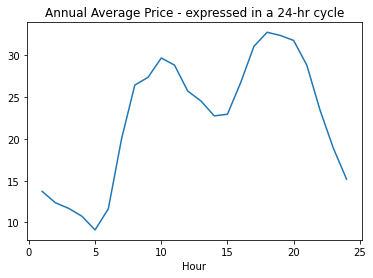

In [176]:
# this graph shows the average price of electricity during the 24-hour cycle, using the 8769 data points, reflecting 365 days of the year.
pivoted_pr_2018.mean().plot()
plt.title('Annual Average Price - expressed in a 24-hr cycle')

Producing another dataframe with the difference between the value at each hour (total of 8760 values) and the mean value for that year, would be useful. This dataframe can inform us about where significant deviations from the norm have occured.

In [87]:
price_spikes = pivoted_pr_2018 - pivoted_pr_2018.mean()

<AxesSubplot:xlabel='Hour', ylabel='Date'>

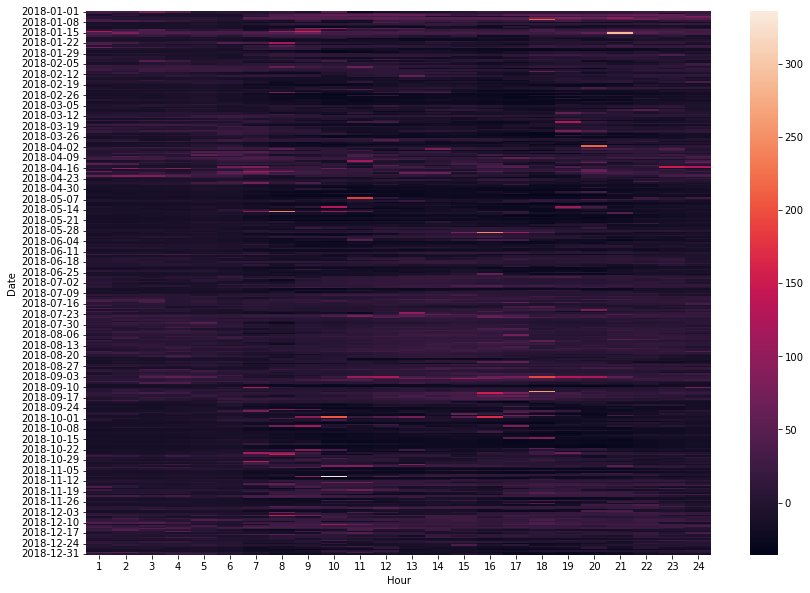

In [88]:
# This graph shows WHERE price spikes have occured
plt.figure(figsize=(14,10))
sns.heatmap(price_spikes)

We see significantly higher prices for the months of January, mid April, and the entirety of July and August.

Furthermore, we can remove some of the columns of the dataframe that we won't be using.

In [47]:
# dropping the columns that we won't be using
pr_2018.drop(['Predisp 1','Predisp 2','Predisp 3','OR 10','OR 30'], inplace=True, axis=1)

In [48]:
# sanity check
pr_2018.sample(5)

,Date,Hour,HOEP,OperatingReserve 10minSynch
4415,2018-07-03,21,39.90,2.42
2314,2018-04-07,8,13.36,0.20
8313,2018-12-13,7,66.27,3.23
6530,2018-09-29,24,4.97,1.00
4967,2018-07-26,21,31.17,1.17


In [49]:
# sanity check
shape(pr_2018)

(8760, 4)

In [49]:
# converting to numeric
pr_2018['HOEP'] = pr_2018['HOEP'].apply(pd.to_numeric)

Looking at the distribution of price is important because a normal distribution with small variance would translate into a very limitted business opportunity.

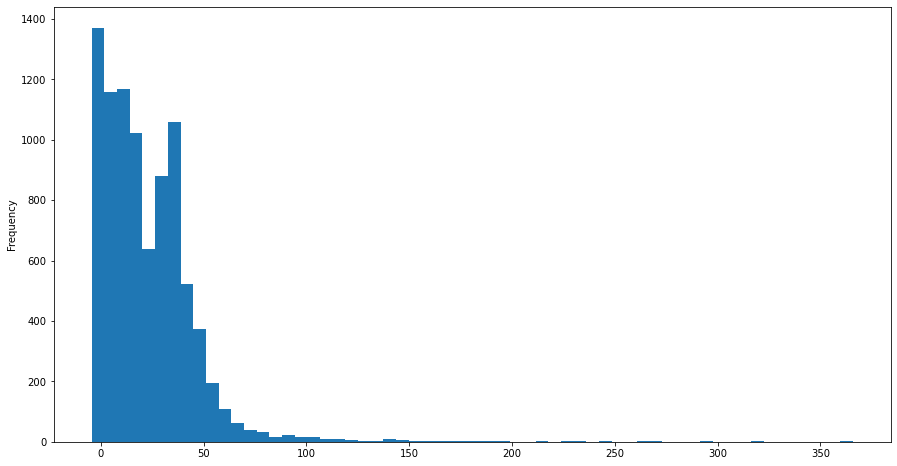

In [50]:
# initiate the plot and setting the size
plt.figure(figsize=(15,8))
pr_2018['HOEP'].plot(kind='hist',bins=60)
plt.show()

This distribution is at the heart of this project. Large frequency of low prices (prices below $10 for each MWh of electricity) create an "Arbitrage-like" opportunity for consumers to buy more than they need, store in a storage unit (large capacity Lithium-ion bank) and utilize the storage when prices go beyond normal.

Essentially, if each household chooses the two thresholds (upperbound and lowerbound of consumption) optimally, the opportunity to buy cheap and disengage from the market during price spikes is an opportunity for saving money for the household, as well as an opportunity for the entreprenuer to sellf this service to the households, while reducing cost for the families, improving system reliability for the electricity grid, reducing greenhouse-gas emissions in the province, and create employment for technicians who would install the necessary hardware.

In [51]:
def show_me_price(day):
    starting_point = (day - 1 ) * 24
    
    # this is a list that stores the 24 values that we are interested in
    hrly_price_list = []

    # this loop will go through 24 values, representing 24 hours in a given day
    for i in range(1,25):
    
        # The row that we are interested in
        row = starting_point + i
        hourly_price = int(pr_2018.loc[row]['HOEP'])
        hrly_price_list.append(hourly_price)
        
    # the following lines will plot the list in order to show the 24-hour fluctuatons
    x = np.arange(24)

    # data = pd.DataFrame(data)
    plt.figure()
    plt.plot(x,hrly_price_list)
    # creating the appropriate title for the graph
    plt.title('Ontario Hourly Price during a 24-hour cycle')
    
    # x axis label
    plt.xlabel('24 Hours representing the 24hr-cycle of each day')
    # y axis label
    plt.ylabel('Price expressed in dollars, for each in MegaWatt-hour of electricity')
    plt.show()

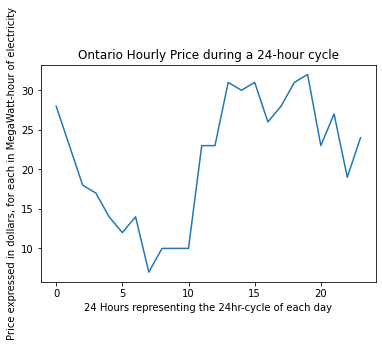

In [52]:
show_me_price(231)

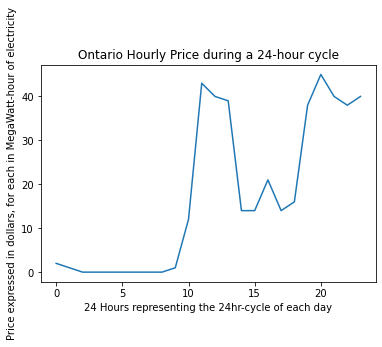

In [53]:
show_me_price(321)

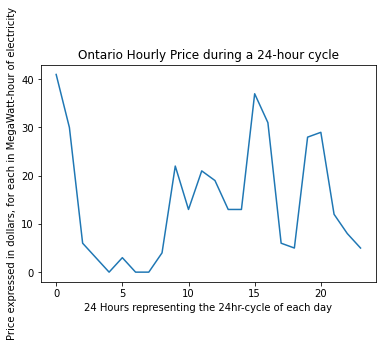

In [54]:
show_me_price(10)

# <center> Generator Output and Capacity </center>

Generator Output and Capacity data provides close-to-real-time output levels for Ontario’s generators
registered as a market participant, and their availability to produce. It is published
hourly, as soon as the data is available, containing data from generators with
capacities 20 MW or greater, registered with the IESO. For this analysis we are using yearly data files available as excel sheets. 

More information is available here: http://reports.ieso.ca/docrefs/helpfile/GenOutputCapability_h4.pdf



In [55]:
# we need to import this package for reading excel files that hold our data

from pandas import read_excel

Output is the actual energy production of the unit or facility. The hourly output is the facility’s five-minute
outputs averaged over an hour.


In [56]:
# Extracting Generator Output and Capacity data
GOC_2018 = {}
OutCap=['Output','Capabilities']

xl_file = pd.ExcelFile('GOC-2018.xlsx')

# this line will extract separate sheets in an excel file
dfs = {sheet_name: xl_file.parse(sheet_name)
          for sheet_name in xl_file.sheet_names}

In [59]:
# sanity check
dfs

{'Output':            Date  Hour  TOTAL  ABKENORA  ADELAIDE  AGUASABON  ALEXANDER  \
 0    2018-01-01     1  18401        16      27.0         36         49   
 1    2018-01-01     2  18082        16      37.0         36         49   
 2    2018-01-01     3  18208        16      40.0         36         49   
 3    2018-01-01     4  17974        16      42.0         36         49   
 4    2018-01-01     5  17797        16      39.0         36         49   
 ...         ...   ...    ...       ...       ...        ...        ...   
 8755 2018-12-31    20  17853        10      23.0         16         45   
 8756 2018-12-31    21  17736        10      43.0         37         45   
 8757 2018-12-31    22  17227        10       8.0         16         45   
 8758 2018-12-31    23  17232        10      54.0         25         45   
 8759 2018-12-31    24  16500        10       1.0         15         45   
 
       AMARANTH  AMHERST ISLAND  APIROQUOIS  ...  WELLS  WEST LINCOLN NRWF  \
 0        

The dictionary above is storing hourly data on output, as well as hourly data on capabilities of each of the nearly 180 electricity generators registered with the IESO.

For the purpose of this analysis we will sum up all capabilities in the file, in order to report total generation capabilities present in the province.

Likewise, we will sum up all output in order to report the hourly output of the province.

In [114]:
cap = pd.DataFrame()
cap = dfs['Capabilities']

In [115]:
# sanity check
cap.shape

(8760, 179)

In [116]:
# sanity check
cap

,Date,Hour,ABKENORA,ADELAIDE,AGUASABON,ALEXANDER,AMARANTH,AMHERST ISLAND,APIROQUOIS,ARMOW,...,WELLS,WEST LINCOLN NRWF,WESTWINDSOR,WHITBYCGS,WHITEDOG,WINDSOR AIRPORT SF,WOLFE ISLAND,YORKCGS-G1,YORKCGS-G2,ZURICH
0,2018-01-01,1,14,29.0,52,65,12.0,NaN,93,33.0,...,220.0,47.0,133,56,50.0,0.0,20.0,232,232,85.0
1,2018-01-01,2,14,33.0,52,65,2.0,NaN,93,50.0,...,220.0,33.0,133,56,50.0,0.0,3.0,232,232,96.0
2,2018-01-01,3,14,39.0,52,65,2.0,NaN,93,80.0,...,220.0,22.0,133,56,50.0,0.0,1.0,232,232,95.0
3,2018-01-01,4,14,39.0,52,65,40.0,NaN,93,37.0,...,220.0,11.0,133,56,50.0,0.0,0.0,232,232,91.0
4,2018-01-01,5,14,38.0,52,65,56.0,NaN,93,136.0,...,220.0,16.0,133,56,50.0,0.0,0.0,232,232,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,20,4,41.0,52,65,54.0,52.0,93,149.0,...,220.0,96.0,133,55,73.0,0.0,40.0,232,232,92.0
8756,2018-12-31,21,4,50.0,52,65,28.0,36.0,93,168.0,...,220.0,155.0,133,55,73.0,0.0,32.0,232,232,97.0
8757,2018-12-31,22,4,45.0,52,65,11.0,34.0,93,139.0,...,220.0,141.0,133,55,73.0,0.0,26.0,232,232,91.0
8758,2018-12-31,23,4,50.0,52,65,52.0,60.0,93,68.0,...,220.0,81.0,133,55,73.0,0.0,27.0,232,232,58.0


In [117]:
# summing up capabilities
cap = dfs['Capabilities']
cap['sum'] = cap.iloc[:,2:180].sum(axis=1)


In [118]:
# sanity check
cap

,Date,Hour,ABKENORA,ADELAIDE,AGUASABON,ALEXANDER,AMARANTH,AMHERST ISLAND,APIROQUOIS,ARMOW,...,WEST LINCOLN NRWF,WESTWINDSOR,WHITBYCGS,WHITEDOG,WINDSOR AIRPORT SF,WOLFE ISLAND,YORKCGS-G1,YORKCGS-G2,ZURICH,sum
0,2018-01-01,1,14,29.0,52,65,12.0,NaN,93,33.0,...,47.0,133,56,50.0,0.0,20.0,232,232,85.0,28628.0
1,2018-01-01,2,14,33.0,52,65,2.0,NaN,93,50.0,...,33.0,133,56,50.0,0.0,3.0,232,232,96.0,28729.0
2,2018-01-01,3,14,39.0,52,65,2.0,NaN,93,80.0,...,22.0,133,56,50.0,0.0,1.0,232,232,95.0,28899.0
3,2018-01-01,4,14,39.0,52,65,40.0,NaN,93,37.0,...,11.0,133,56,50.0,0.0,0.0,232,232,91.0,28583.0
4,2018-01-01,5,14,38.0,52,65,56.0,NaN,93,136.0,...,16.0,133,56,50.0,0.0,0.0,232,232,92.0,29352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,20,4,41.0,52,65,54.0,52.0,93,149.0,...,96.0,133,55,73.0,0.0,40.0,232,232,92.0,30912.0
8756,2018-12-31,21,4,50.0,52,65,28.0,36.0,93,168.0,...,155.0,133,55,73.0,0.0,32.0,232,232,97.0,30968.0
8757,2018-12-31,22,4,45.0,52,65,11.0,34.0,93,139.0,...,141.0,133,55,73.0,0.0,26.0,232,232,91.0,31016.0
8758,2018-12-31,23,4,50.0,52,65,52.0,60.0,93,68.0,...,81.0,133,55,73.0,0.0,27.0,232,232,58.0,30787.0


In [119]:
# sanity check
cap['sum']

0       28628.0
1       28729.0
2       28899.0
3       28583.0
4       29352.0
         ...   
8755    30912.0
8756    30968.0
8757    31016.0
8758    30787.0
8759    31618.0
Name: sum, Length: 8760, dtype: float64

In [91]:
# summing up total output
out = dfs['Output']
out['sum'] = out.iloc[:,3:180].sum(axis=1)

In [92]:
# sanity check
out

,Date,Hour,TOTAL,ABKENORA,ADELAIDE,AGUASABON,ALEXANDER,AMARANTH,AMHERST ISLAND,APIROQUOIS,...,WEST LINCOLN NRWF,WESTWINDSOR,WHITBYCGS,WHITEDOG,WINDSOR AIRPORT SF,WOLFE ISLAND,YORKCGS-G1,YORKCGS-G2,ZURICH,sum
0,2018-01-01,1,18401,16,27.0,36,49,6.0,NaN,70,...,46.0,0,57,3.0,0.0,17.0,0,0,88.0,18401.0
1,2018-01-01,2,18082,16,37.0,36,49,1.0,NaN,70,...,32.0,0,57,2.0,0.0,2.0,0,0,98.0,18082.0
2,2018-01-01,3,18208,16,40.0,36,49,3.0,NaN,70,...,19.0,0,57,2.0,0.0,0.0,0,0,95.0,18208.0
3,2018-01-01,4,17974,16,42.0,36,49,47.0,NaN,70,...,12.0,0,57,1.0,0.0,0.0,0,0,94.0,17974.0
4,2018-01-01,5,17797,16,39.0,36,49,61.0,NaN,70,...,17.0,0,57,1.0,0.0,0.0,0,0,94.0,17797.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,20,17853,10,23.0,16,45,54.0,47.0,87,...,84.0,0,57,47.0,0.0,38.0,0,0,93.0,17853.0
8756,2018-12-31,21,17736,10,43.0,37,45,22.0,27.0,87,...,167.0,0,57,55.0,0.0,28.0,0,0,98.0,17736.0
8757,2018-12-31,22,17227,10,8.0,16,45,13.0,17.0,87,...,91.0,0,57,46.0,0.0,24.0,0,0,90.0,17227.0
8758,2018-12-31,23,17232,10,54.0,25,45,55.0,62.0,86,...,72.0,0,57,46.0,0.0,28.0,0,0,52.0,17232.0


In [65]:
# testing a method for expressing numeric values with a specific format
"%04d" % (43)

'0043'

Having a function which would accept a numerical variable (between 1 and 365) and produce the shape of the output during a 24-hr cycle, would allow us to see how Ontario's electricity producers react to the market's fluctuating demand.

In [93]:
def show_me_output(day):
    starting_point = (day - 1 ) * 24
    
    # this is a list that stores the 24 values that we are interested in
    hrly_gen_list = []

    # this loop will go through 24 values, representing 24 hours in a given day
    for i in range(1,25):
    
        # The row that we are interested in
        row = starting_point + i
        hourly_gen = int(out.loc[row]['TOTAL'])
        hrly_gen_list.append(hourly_gen)
        
    # the following lines will plot the list in order to show the 24-hour fluctuatons
    x = np.arange(24)

    # data = pd.DataFrame(data)
    plt.figure()
    plt.plot(x,hrly_gen_list)
    # creating the appropriate title for the graph
    plt.title('Ontario Hourly Output during a 24-hour cycle')
    
    # x axis label
    plt.xlabel('24 Hours representing the 24hr-cycle of each day')
    # y axis label
    plt.ylabel('MegaWatt-hour of electricity')
    plt.show()

We can test this function by giving it integers (as input) and observe the graph that it produces.

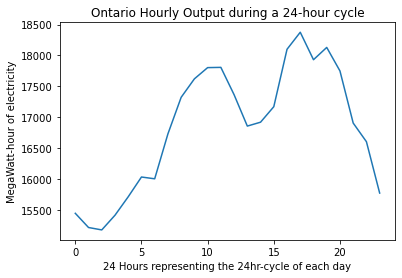

In [94]:
show_me_output(42)

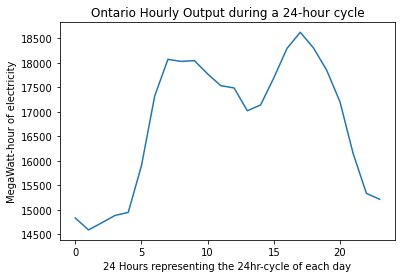

In [95]:
show_me_output(52)

Furthermore, we can investigate the distribution of this variable, to see how often different levels of output occur.

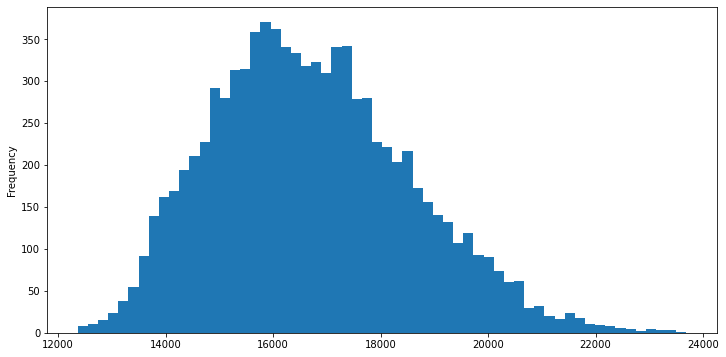

In [96]:
# initiate the plot and setting the size
plt.figure(figsize=(12,6))
out['sum'].plot(kind='hist',bins=60)
plt.show()


We will repeat the process we did for the price dataframe, in order to investigate daily fluctuations of output during the one-year time frame that we are looking at.

In [120]:
pd.pivot(out.sort_values('Hour'),index='Date',columns='Hour',values="sum")

Hour,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,18401.0,18082.0,18208.0,17974.0,17797.0,18044.0,19004.0,19280.0,19109.0,19584.0,...,19323.0,20219.0,21505.0,22749.0,22351.0,22214.0,22011.0,21045.0,19421.0,19152.0
2018-01-02,19058.0,18002.0,18032.0,17714.0,18218.0,18912.0,20093.0,21457.0,21884.0,22146.0,...,21344.0,21558.0,22467.0,23337.0,23188.0,22758.0,22966.0,21386.0,19855.0,19366.0
2018-01-03,18324.0,18245.0,18067.0,18005.0,18332.0,18474.0,19376.0,20645.0,21243.0,21629.0,...,20870.0,21568.0,22271.0,22991.0,22600.0,21715.0,21359.0,20605.0,19765.0,18302.0
2018-01-04,17326.0,17035.0,17236.0,17408.0,17601.0,18502.0,19589.0,20531.0,21027.0,20848.0,...,20082.0,20232.0,20435.0,21590.0,21486.0,21670.0,21304.0,20937.0,20798.0,20150.0
2018-01-05,18680.0,17650.0,17542.0,17691.0,18304.0,18662.0,19736.0,20596.0,20970.0,21033.0,...,21054.0,21823.0,22688.0,23450.0,23692.0,23014.0,23154.0,22437.0,20962.0,20111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,16031.0,15919.0,16003.0,15830.0,16097.0,16499.0,16888.0,18438.0,18969.0,19133.0,...,19104.0,19282.0,19551.0,20545.0,20394.0,20154.0,19939.0,19458.0,18485.0,17721.0
2018-12-28,17026.0,16405.0,16119.0,15936.0,15864.0,16153.0,16793.0,18006.0,18284.0,18415.0,...,18979.0,18496.0,18492.0,19346.0,19567.0,19539.0,19248.0,18842.0,17499.0,17024.0
2018-12-29,16395.0,15987.0,15734.0,15542.0,15709.0,15796.0,16082.0,16764.0,17012.0,17145.0,...,17117.0,16951.0,17203.0,17914.0,17969.0,18156.0,17920.0,17239.0,16806.0,16140.0


A pivot table in this case can be useful for further exploring variations in the output.

In [121]:
output_pivot = pd.pivot(out.sort_values('Hour'),index='Date',columns='Hour',values="sum")

It would be useful to look at the average output during the 24-hr cycle, using this pivot table that we produced.

Text(0.5, 1.0, 'Annual Average Output - expressed in a 24-hr cycle')

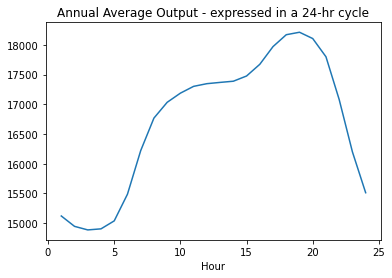

In [172]:
# producing the plot
output_pivot.mean().plot()
plt.title('Annual Average Output - expressed in a 24-hr cycle')

We can now investigate deviations from the mean in our output dataframe.

In [77]:
output_deviation = output_pivot - output_pivot.mean()

<AxesSubplot:xlabel='Hour', ylabel='Date'>

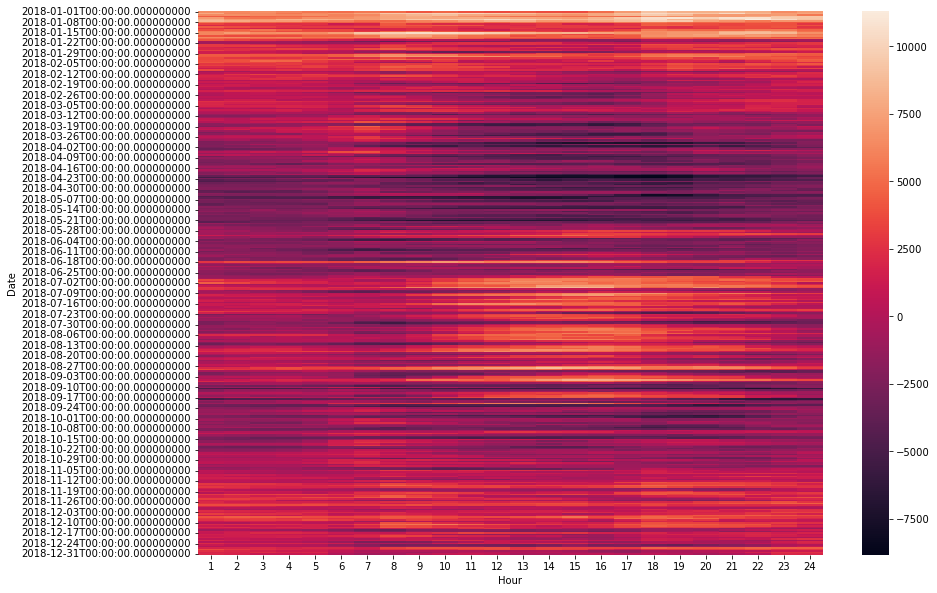

In [123]:
# This graph shows WHERE significant deviations have occured
plt.figure(figsize=(14,10))
sns.heatmap(output_deviation)

The heatmap above exhibits lighter colors during January (when residents are in need of more electricity because of the cold weather) and during July and August (when residents are in need of more electricity because of very warm temperatures which require air conditioning).

Darker colors can be observed during April and October, when temperatures outside are expected to be fairly close to the temperatures that are considered comfortable room temperatures. In other words, temperatures around 15 degrees celsius to 25 degrees celsius are associated with less than average demand for electricity.

We can safely assume that system administrators seek to adjust the system's output in order to meet anticipated demand (chasing demand ex-post if they fail to adequately meet the anticipate demand).

The fact that we have knowledge of the system's capacity to generate electricity, allows us to investigate how much of this capacity is being utilized, in order to meet demand. We can call this variable "Output/Capacity ratio".

In [129]:
cap['sum']

0       28628.0
1       28729.0
2       28899.0
3       28583.0
4       29352.0
         ...   
8755    30912.0
8756    30968.0
8757    31016.0
8758    30787.0
8759    31618.0
Name: sum, Length: 8760, dtype: float64

In [130]:
new_df = pd.DataFrame()
new_df['Output/cap ratio'] = out['TOTAL']/cap['sum']

In [132]:
# sanity check
new_df.shape

(8760, 1)

We can have a look at the distribution of this ratio.

<Figure size 432x288 with 0 Axes>

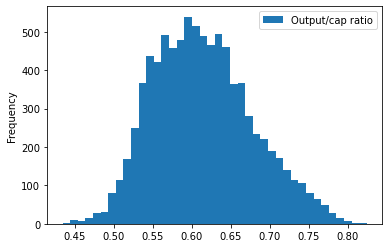

In [135]:
plt.figure()
new_df.plot(kind='hist',bins=40)
plt.show()

This distribution indicates that Ontario (for the most part) is capable of meeting system's demand with utilizing nearly 60% of its capabilities. However, during peak hours this ratio can climb all the way to 80% and slightly beyond. We may need to investigate this variable further.

# <center> Agglomeration of Important Visuals </center>

The three files that we have looked at thus far have given us an overview of the electricity market:
 * demand follows a pattern that is in part influenced by the weather;
 * IESO plans electricity output as it anticipates demand fluctuations;
 * prices fluctuate in order to provide incentive for different electricity producers to utilize various technologies (nuclear, hydro, thermal, and others) and offer electricity to the consumers.
 
These variables are separate, but closely related. We shall take another look at a few familiar graphs.

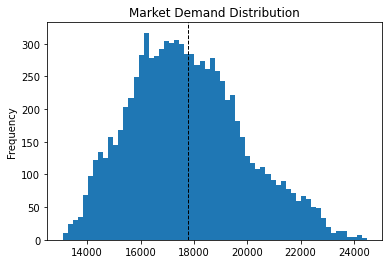

In [142]:
d_2018["Market Demand"] = pd.to_numeric(d_2018["Market Demand"], downcast="float")

plt.figure()
# market demand shown by a histogram
d_2018['Market Demand'].plot(kind='hist', bins=60)
plt.axvline(d_2018['Market Demand'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Market Demand Distribution')
plt.show()

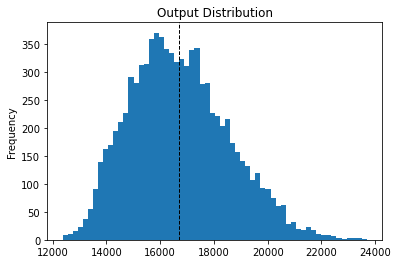

In [143]:
plt.figure()
out['sum'].plot(kind='hist',bins=60)
plt.axvline(out['sum'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Output Distribution')
plt.show()

Text(0.5, 1.0, "Deviations in Ontario's Electricity output")

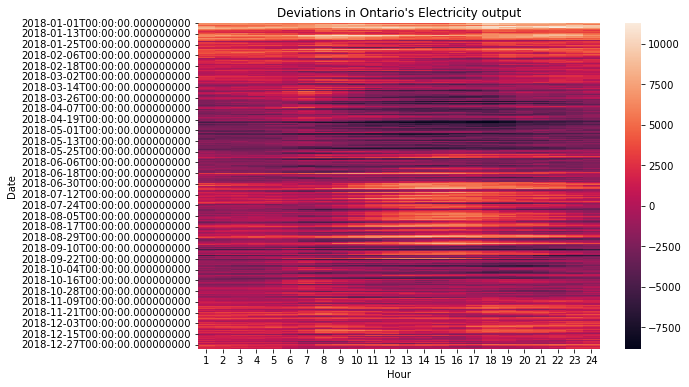

In [149]:
plt.figure(figsize=(9,6))
sns.heatmap(output_deviation)
plt.title('Deviations in Ontario\'s Electricity output')

Text(0.5, 1.0, "Deviations in Ontario's Electricity Demand")

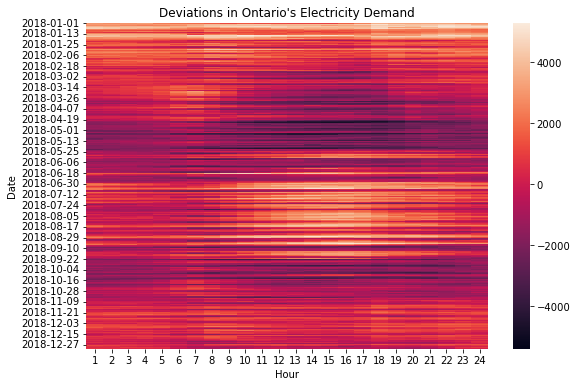

In [148]:
plt.figure(figsize=(9,6))
sns.heatmap(demand_deviation)
plt.title('Deviations in Ontario\'s Electricity Demand')


Text(0.5, 1.0, 'Price Spikes')

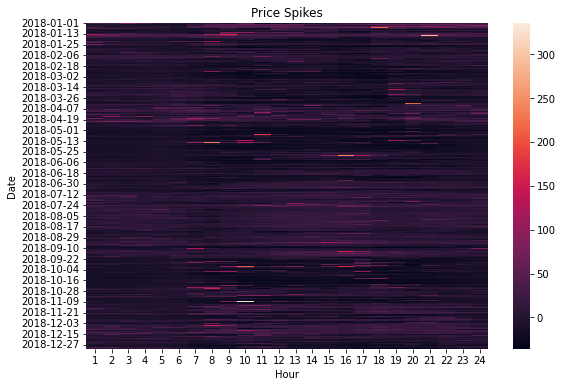

In [150]:
# This graph shows WHERE price spikes have occured
plt.figure(figsize=(9,6))
sns.heatmap(price_spikes)
plt.title('Price Spikes')

We can clearly see that prices are generally higher during July and August, as demand increases and Ontario's power grid experiences more stress. Large price spikes, however, are spread all over the year, with a visible concentration around morning time, and once again between 16h and 20h.

We can now investigate shape of demand, shape of output, and average prices for the 24-hr cycle.

Text(0.5, 1.0, 'Shape of output - annual average expressed for each hour of the 24-hr cycle')

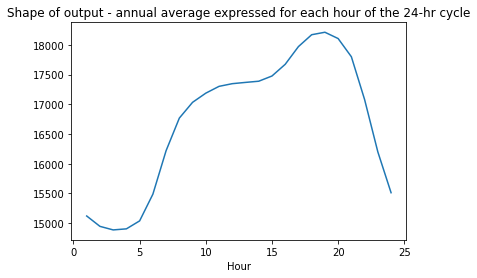

In [159]:
# producing the output plot
output_pivot.mean().plot()
plt.title('Shape of output - annual average expressed for each hour of the 24-hr cycle')

Text(0.5, 1.0, 'Average Demand - Annual average expressed for each hour of the 24-hr cycle')

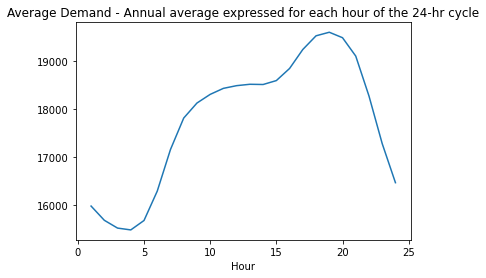

In [160]:
# this graph shows the average price of electricity during the 24-hour cycle, 
# using the 8769 data points, reflecting 365 days of the year.
pivot_d_2018.mean().plot()
plt.title('Average Demand - Annual average expressed for each hour of the 24-hr cycle')

Text(0.5, 1.0, 'Average price - Annual average expressed for each hour of the 24-hr cycle')

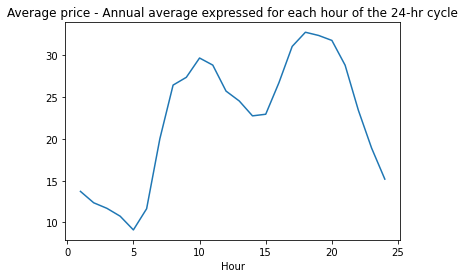

In [161]:
# this graph shows the average price of electricity during the 24-hour cycle, 
# using the 8769 data points, reflecting 365 days of the year.
pivoted_pr_2018.mean().plot()
plt.title('Average price - Annual average expressed for each hour of the 24-hr cycle')

The annual averages (demand and output) which are expressed in hourly terms, show that demand and output follow each other closely. Price (expressed in dollars for each MWh of electricity) exhibits a similar shape. This makes sense, because higher levels of transaction (in form of electricity) puts more stress on the system. And the System Operator (IESO) adjusts the price in order to recuperate the costs incurred for maintenance.

Deviations from the norm, however, are what this analysis is interested in. For this reason, taking another look at the distribution of the price wuld be very helpful.

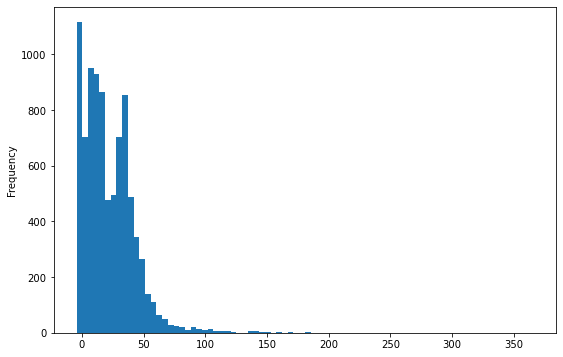

In [163]:
# initiate the plot and setting the size
plt.figure(figsize=(9,6))
pr_2018['HOEP'].plot(kind='hist',bins=80)
plt.show()

## Concluding remarks:




This notebook has all the information that a data scientist would need to start a thorough analysis, before indulging in feature engineering. 

The demand fluctuations, output fluctuations, and price fluctuations have been captured and shown in three forms: Line chart, distribution, and heatmap.

We can now begin further analysis by creating new dataframes that include features of interest, and begin modelling and learning.

Before ending this notebook, we will save the important columns as a CSV file.

In [166]:
final_df = pd.DataFrame()
final_df['Date'] = pr_2018['Date']
final_df['Hour'] = pr_2018['Hour']
final_df['Market Demand'] = d_2018['Market Demand']
final_df['Output'] = out['TOTAL']
final_df['Capacity'] = cap['sum']
final_df['Output/Cap ratio'] = new_df['Output/cap ratio']
final_df['Price'] = pr_2018['HOEP']

In [167]:
# sanity check
final_df.head()

,Date,Hour,Market Demand,Output,Capacity,Output/Cap ratio,Price
3,2018-01-01,1,18662.0,17974.0,28583.0,0.628835,51.29
4,2018-01-01,2,18060.0,17797.0,29352.0,0.606330,43.59
5,2018-01-01,3,18429.0,18044.0,29590.0,0.609801,93.60
6,2018-01-01,4,19137.0,19004.0,29902.0,0.635543,54.78
7,2018-01-01,5,19470.0,19280.0,30079.0,0.640979,14.35


In [168]:
#saving the file
final_df.to_csv('data_step_one.csv')